# Data Analysis

Ideas for anaysis:
- Boxplots for rentprices per city
- Bar charts for rent prices
- (Comparison of baseRent/totalRent/service)
- Heatmap germany with the citys and the rentprices
- ...
- ...
- 
- (Setting base values for the input)
- Funktions for input

- 

### 1. Reading in the Data 

In [2]:
#Initialising the needed libaries
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 



In [3]:
#Setting the option that all columns are shown.
pd.set_option('display.max_columns', 100)

In [4]:
#Data from the Main-Dataset
Uni4U_Data = pd.read_csv(r"data/Uni4U_final.csv")

In [5]:
#Data with just raw the University information
uni_only_adjusteddata = pd.read_excel(r"data\Adjusted_University_Data.xlsx")   

In [6]:
#Data with just raw Appartment information
appartments_only_adjusteddata = pd.read_excel(r"data\Adjusted_Appartment_Data.xlsx")

In [7]:
#Data with only the raw Population information
population_only_adjusteddata=pd.read_excel(r"data\Adjusted_Population_Data.xlsx")

We add the raw data from each file in case somebody wants to compare or take a look at something. We will not use it or take into account.

In [8]:
#Data with only the raw Population information
population_only_rawdata=pd.read_csv(r"data/Deutschland_Cities.csv")
#population_data=pd.read_csv(r"\Users\jaho3\Downloads\TechLabs\TechLabs\Deutschland_Cities.csv")

In [9]:
#Data with just raw Appartment information
#appartments = pd.read_csv(r"\Users\jaho3\Downloads\archive (3)\immo_data.csv", usecols = ['regio1','serviceCharge','balcony','telekomUploadSpeed','totalRent', "yearConstructed", "hasKitchen","cellar", "baseRent","livingSpace","petsAllowed", "lift","noRooms", "garden", "regio2", "regio3" ])
appartments_only_rawdata = pd.read_csv(r"data/immo_data.csv")

In [10]:
#Data with just raw the University information
#data = pd.read_csv(r"\Users\jaho3\OneDrive\Documents\group-3\archive\cwurData.csv")#, usecols = ['world_rank',"institution","country", "national_rank", "quality_of_education", "quality_of_faculty", "year"])   
uni_only_rawdata = pd.read_csv(r"data\cwurData.csv")   

##### 1.1. Input-Functions

In [38]:
#This function will ask for a city name. If the city name does not exists then there will be an error message.
def input_city_adjusted():
    city=input("Please enter a city name")
    city=str(city)
    

    if city in Uni4U_Data["city"].unique():
        return city
    elif city in appartments_only_adjusteddata["regio2"].unique():
        return city
    elif city in population_only_adjusteddata["city"].unique():
        return city
    elif city in uni_only_adjusteddata["city"].unique():
        return city

    else:
        city="Hamburg" #Select a standard value so the code can always run.
        print("Oh no! Looks like there was a Problem. Please try again! Make sure you wirte the city correct")
        return city
    

In [39]:
#This function will ask for a column name. If the column name does not exists in the correspondend Dataset then there will be an error message.
def input_uni4u_column_adjusted():
    ux=input("Please enter a column name from the Uni4U Dataset.")
    
    

    if ux in Uni4U_Data.columns:
        return ux

    else:
        ux="totalRent_median" #Select a standard value so the code can always run.
        print("Oh no! Looks like there was a Problem. totalRent_median has been selected as a standard value. Please try again! Make sure you wirte the column name correct and you use a column from the Uni4U Dataset.")
        return ux

In [88]:
#This function will ask for a column name. If the column name does not exists in the correspondend Dataset then there will be an error message.
def input_appartment_column_adjusted():
    ax=input("Please enter a column name from the appartments_only_adjusteddata Dataset.")
    
    if ax in appartments_only_adjusteddata.columns:
        return ax

    else:
        ax="totalRent"
        print("Oh no! Looks like there was a Problem. totalRent has been selected as a standard value. Please try again! Make sure you wirte the column name correct and you use a column from the appartments_only_adjusteddata Dataset.")
        return ax

In [94]:
#This function will ask for a column name. If the column name does not exists in the correspondend Dataset then there will be an error message.
def input_population_column_adjusted():
    px=input("Please enter a column name from the population_only_adjusteddata Dataset.")
    
    if px in population_only_adjusteddata.columns:
        return px

    else:
        px="population"
        print("Oh no! Looks like there was a Problem. population has been selected as a standard value. Please try again! Make sure you wirte the column name correct and you use a column from the population_only_adjusteddata Dataset.")
        return px

In [93]:
#This function will ask for a column name. If the column name does not exists in the correspondend Dataset then there will be an error message.
def input_uniad_column_adjusted():
    uax=input("Please enter a column name from the uni_only_adjusteddata Dataset.")
    
    if uax in uni_only_adjusteddata.columns:
        return uax

    else:
        uax="national_rank"
        print("Oh no! Looks like there was a Problem. national_rank has been selected as a standard value. Please try again! Make sure you wirte the column name correct and you use a column from the uni_only_adjusteddata Dataset.")
        return uax

### 2. Analysing the Data

##### 2.x. Basic information

In [16]:
#Here we get all the column names.
Uni4U_Data.columns

Index(['Unnamed: 0', 'old_index', 'world_rank', 'institution', 'country',
       'national_rank', 'quality_of_education', 'quality_of_faculty', 'year',
       'city', 'totalRent_mean', 'totalRent_median', 'serviceCharge_mean',
       'serviceCharge_median', 'baseRent_mean', 'baseRent_median',
       'livingSpace_mean', 'livingSpace_median', 'noRooms_mean',
       'noRooms_median', 'hasKitchen_percentage', 'cellar_percentage',
       'lift_percantage', 'lift_y', 'telekomUploadSpeed_mean',
       'telekomUploadSpeed_median', 'yearConstructed_mean',
       'yearConstructed_median', 'population_per_city'],
      dtype='object')

In [50]:
#Shows the count of rows and columns
Uni4U_Data.shape

(115, 29)

In [31]:
#Here we get information about the data type for each column
Uni4U_Data.dtypes

Unnamed: 0                     int64
old_index                      int64
world_rank                     int64
institution                   object
country                       object
national_rank                  int64
quality_of_education           int64
quality_of_faculty             int64
year                           int64
city                          object
totalRent_mean               float64
totalRent_median             float64
serviceCharge_mean           float64
serviceCharge_median         float64
baseRent_mean                float64
baseRent_median              float64
livingSpace_mean             float64
livingSpace_median           float64
noRooms_mean                 float64
noRooms_median               float64
hasKitchen_percentage        float64
cellar_percentage            float64
lift_percantage              float64
lift_y                       float64
telekomUploadSpeed_mean      float64
telekomUploadSpeed_median    float64
yearConstructed_mean         float64
y

In [41]:
#Let you chose a column and shows you every unique value.
Uni4U_Data[input_uni4u_column_adjusted()].unique()

array(['Heidelberg', 'München', 'Bonn', 'Freiburg', 'Berlin', 'Tübingen',
       'Frankfurt am Main', 'Göttingen', 'Hamburg', 'Köln', 'Münster',
       'Erlangen', 'Karlsruhe', 'Würzburg', 'Kiel', 'Dresden', 'Aachen',
       'Mainz', 'Düsseldorf', 'Ulm', 'Hannover', 'Leipzig', 'Stuttgart',
       'Duisburg', 'Bochum', 'Darmstadt', 'Regensburg',
       'Marburg Biedenkopf', 'Jena', 'Giessen', 'Saarbrücken', 'Dortmund',
       'Konstanz', 'Rostock', 'Bielefeld', 'Magdeburg', 'Halle',
       'Potsdam', 'Bayreuth', 'Bremen', 'Braunschweig', 'Kaiserslautern',
       'Augsburg', 'Lübeck', 'Greifswald', 'Siegen Wittgenstein',
       'Mannheim', 'Osnabrück', 'Chemnitz', 'Oldenburg'], dtype=object)

In [44]:
#Let you chose a column and shows you special statistical information.
Uni4U_Data[input_uni4u_column_adjusted()].describe()

Oh no! Looks like there was a Problem. totalRent_median has been selected as a standard value. Please try again and make sure you wirte the column name correct and you use a column from the Uni4U Dataset.


count     115.000000
mean      928.759739
std       318.340814
min       420.000000
25%       673.500000
50%       870.000000
75%      1112.000000
max      1650.000000
Name: totalRent_median, dtype: float64

In [49]:
#Let you chose a column and only displays itself. (To show more than one column add a ", input_uni4u_column_adjusted()" after the first "input_uni4u_column_adjusted()" as often as you wish and then chose the wanted columns)
Uni4U_Data.loc[:,[input_uni4u_column_adjusted()]]

Oh no! Looks like there was a Problem. totalRent_median has been selected as a standard value. Please try again and make sure you wirte the column name correct and you use a column from the Uni4U Dataset.


,totalRent_median
0,1290.0
1,1650.0
2,1650.0
3,1650.0
4,1290.0
...,...
110,1400.0
111,790.0
112,665.0
113,760.0


##### 2.x. Filtering

Here we filter the Data for specific questions

Question: Which University has the best quality of education while at the same time is located in a city where the total rent median is not more than 700€?:

<details>    
<summary>
    <font size="2" color="red"><b>Answer (click to expand)</b></font>
</summary>
<p>
   University of Göttingen
</p>
</details>  

In [18]:
#Which University has the best quality of education while at the same time is located in a city where the total rent is not more than 700€?
filt=(Uni4U_Data["totalRent_median"]<701)
Uni4U_Data[filt].sort_values(by="quality_of_education", ascending=True).head() 

,Unnamed: 0,old_index,world_rank,institution,country,national_rank,quality_of_education,quality_of_faculty,year,city,totalRent_mean,totalRent_median,serviceCharge_mean,serviceCharge_median,baseRent_mean,baseRent_median,livingSpace_mean,livingSpace_median,noRooms_mean,noRooms_median,hasKitchen_percentage,cellar_percentage,lift_percantage,lift_y,telekomUploadSpeed_mean,telekomUploadSpeed_median,yearConstructed_mean,yearConstructed_median,population_per_city
14,14,368,169,University of Göttingen,Germany,10,39,172,2014,Göttingen,802.208380,696.0,154.809463,144.0,641.816525,556.5,68.889830,65.41,2.704255,2.0,0.470922,0.453901,0.154610,0.154610,32.177134,40.0,1973.485887,1978.0,119801.0
70,70,1376,177,University of Göttingen,Germany,11,43,176,2015,Göttingen,802.208380,696.0,154.809463,144.0,641.816525,556.5,68.889830,65.41,2.704255,2.0,0.470922,0.453901,0.154610,0.154610,32.177134,40.0,1973.485887,1978.0,119801.0
21,21,431,232,University of Kiel,Germany,17,180,192,2014,Kiel,762.546050,682.0,119.854339,100.0,614.121678,520.0,66.652945,63.00,2.446952,2.0,0.642694,0.681507,0.237443,0.237443,26.147330,40.0,1933.686122,1959.0,247548.0
76,76,1414,215,University of Kiel,Germany,17,193,198,2015,Kiel,762.546050,682.0,119.854339,100.0,614.121678,520.0,66.652945,63.00,2.446952,2.0,0.642694,0.681507,0.237443,0.237443,26.147330,40.0,1933.686122,1959.0,247548.0
29,29,498,299,Leipzig University,Germany,25,308,201,2014,Leipzig,743.167133,588.0,148.101223,131.0,575.334295,433.0,72.472193,64.40,2.586845,2.0,0.241147,0.620324,0.311160,0.311160,33.154892,40.0,1951.521097,1964.0,542529.0


Question: Which University has the best rank from 2015?:

<details>    
<summary>
    <font size="2" color="red"><b>Answer (click to expand)</b></font>
</summary>
<p>
    Ruprecht Karl University of Heidelberg
</p>
</details>   

In [19]:
filt=(Uni4U_Data["year"]==2015)
Uni4U_Data[filt].sort_values(by="national_rank", ascending=True).head()

,Unnamed: 0,old_index,world_rank,institution,country,national_rank,quality_of_education,quality_of_faculty,year,city,totalRent_mean,totalRent_median,serviceCharge_mean,serviceCharge_median,baseRent_mean,baseRent_median,livingSpace_mean,livingSpace_median,noRooms_mean,noRooms_median,hasKitchen_percentage,cellar_percentage,lift_percantage,lift_y,telekomUploadSpeed_mean,telekomUploadSpeed_median,yearConstructed_mean,yearConstructed_median,population_per_city
60,60,1275,76,Ruprecht Karl University of Heidelberg,Germany,1,38,51,2015,Heidelberg,1348.422541,1290.0,207.847157,200.00,1148.408448,1100.0,84.978429,85.0,2.825670,3.0,0.593870,0.653257,0.450192,0.450192,4.189318,2.4,1978.135338,1998.0,160355.0
61,61,1278,79,Ludwig Maximilian University of Munich,Germany,2,42,92,2015,München,1904.166454,1650.0,193.623375,180.00,1712.898009,1490.0,92.774910,75.0,2.542332,2.5,0.618810,0.703275,0.582069,0.582069,31.210324,40.0,1986.187410,1995.0,1471508.0
62,62,1300,101,Technical University of Munich,Germany,3,37,177,2015,München,1904.166454,1650.0,193.623375,180.00,1712.898009,1490.0,92.774910,75.0,2.542332,2.5,0.618810,0.703275,0.582069,0.582069,31.210324,40.0,1986.187410,1995.0,1471508.0
63,63,1346,147,Free University of Berlin,Germany,4,76,128,2015,Berlin,1385.341741,1124.0,199.041765,164.95,1165.311461,945.0,81.817844,72.0,2.565520,2.0,0.592158,0.537094,0.483375,0.483375,32.195063,40.0,1965.192072,1978.0,3644826.0
64,64,1352,153,Humboldt University of Berlin,Germany,5,291,108,2015,Berlin,1385.341741,1124.0,199.041765,164.95,1165.311461,945.0,81.817844,72.0,2.565520,2.0,0.592158,0.537094,0.483375,0.483375,32.195063,40.0,1965.192072,1978.0,3644826.0


Question: Which University ranked in 2015 is located in Hamburg, München or Berlin and has the highest percentage on appartments with a lift?:

<details>    
<summary>
    <font size="2" color="red"><b>Answer (click to expand)</b></font>
</summary>
<p>
    Ludwig Maximilian University of Munich
</p>
</details>   

In [20]:
filt=(Uni4U_Data["year"]==2015) & (Uni4U_Data["city"]=="München") | (Uni4U_Data["year"]==2015) &(Uni4U_Data["city"]=="Hamburg") | (Uni4U_Data["year"]==2015) &(Uni4U_Data["city"]=="Berlin")  
Uni4U_Data[filt].sort_values(by="lift_percantage", ascending=False)

,Unnamed: 0,old_index,world_rank,institution,country,national_rank,quality_of_education,quality_of_faculty,year,city,totalRent_mean,totalRent_median,serviceCharge_mean,serviceCharge_median,baseRent_mean,baseRent_median,livingSpace_mean,livingSpace_median,noRooms_mean,noRooms_median,hasKitchen_percentage,cellar_percentage,lift_percantage,lift_y,telekomUploadSpeed_mean,telekomUploadSpeed_median,yearConstructed_mean,yearConstructed_median,population_per_city
61,61,1278,79,Ludwig Maximilian University of Munich,Germany,2,42,92,2015,München,1904.166454,1650.0,193.623375,180.00,1712.898009,1490.0,92.774910,75.0,2.542332,2.5,0.618810,0.703275,0.582069,0.582069,31.210324,40.0,1986.187410,1995.0,1471508.0
62,62,1300,101,Technical University of Munich,Germany,3,37,177,2015,München,1904.166454,1650.0,193.623375,180.00,1712.898009,1490.0,92.774910,75.0,2.542332,2.5,0.618810,0.703275,0.582069,0.582069,31.210324,40.0,1986.187410,1995.0,1471508.0
63,63,1346,147,Free University of Berlin,Germany,4,76,128,2015,Berlin,1385.341741,1124.0,199.041765,164.95,1165.311461,945.0,81.817844,72.0,2.565520,2.0,0.592158,0.537094,0.483375,0.483375,32.195063,40.0,1965.192072,1978.0,3644826.0
64,64,1352,153,Humboldt University of Berlin,Germany,5,291,108,2015,Berlin,1385.341741,1124.0,199.041765,164.95,1165.311461,945.0,81.817844,72.0,2.565520,2.0,0.592158,0.537094,0.483375,0.483375,32.195063,40.0,1965.192072,1978.0,3644826.0
89,89,1544,345,Technical University of Berlin,Germany,30,85,218,2015,Berlin,1385.341741,1124.0,199.041765,164.95,1165.311461,945.0,81.817844,72.0,2.565520,2.0,0.592158,0.537094,0.483375,0.483375,32.195063,40.0,1965.192072,1978.0,3644826.0
68,68,1361,162,University of Hamburg,Germany,9,314,135,2015,Hamburg,1411.919105,1233.0,204.971001,180.00,1185.550048,1014.0,83.582416,76.0,2.709338,3.0,0.787709,0.581272,0.395318,0.395318,34.152286,40.0,1980.548754,1993.0,1841179.0


##### 2.x. Sorting the Data

In [100]:
#Sorting the Data by a wished column:
Uni4U_Data.sort_values(by=input_uni4u_column_adjusted(), ascending=True) #Change "ascending=" to False to show the highest values first.

Oh no! Looks like there was a Problem. totalRent_median has been selected as a standard value. Please try again and make sure you wirte the column name correct and you use a column from the Uni4U Dataset.


,Unnamed: 0,old_index,world_rank,institution,country,national_rank,quality_of_education,quality_of_faculty,year,city,totalRent_mean,totalRent_median,serviceCharge_mean,serviceCharge_median,baseRent_mean,baseRent_median,livingSpace_mean,livingSpace_median,noRooms_mean,noRooms_median,hasKitchen_percentage,cellar_percentage,lift_percantage,lift_y,telekomUploadSpeed_mean,telekomUploadSpeed_median,yearConstructed_mean,yearConstructed_median,population_per_city
58,58,1119,920,Chemnitz University of Technology,Germany,54,355,210,2014,Chemnitz,458.504498,420.00,124.986924,120.0,325.567874,295.00,62.503412,59.03,2.496619,2.0,0.231809,0.765249,0.177495,0.177495,30.605248,40.0,1935.814323,1920.0,245403.0
45,45,707,508,Martin Luther University of Halle-Wittenberg,Germany,41,345,202,2014,Halle,552.031719,472.00,110.612768,92.0,394.847682,329.89,62.422620,57.89,2.604272,3.0,0.146988,0.608105,0.231763,0.231763,22.720827,40.0,1960.788451,1973.0,239257.0
99,99,1696,497,Martin Luther University of Halle-Wittenberg,Germany,40,358,210,2015,Halle,552.031719,472.00,110.612768,92.0,394.847682,329.89,62.422620,57.89,2.604272,3.0,0.146988,0.608105,0.231763,0.231763,22.720827,40.0,1960.788451,1973.0,239257.0
44,44,699,500,Otto-von-Guericke University Magdeburg,Germany,40,355,210,2014,Magdeburg,587.791443,509.36,136.214980,130.0,421.331556,364.00,65.327136,61.90,2.460165,2.0,0.229012,0.615432,0.205144,0.205144,34.521260,40.0,1945.500863,1937.0,238697.0
103,103,1735,536,Otto-von-Guericke University Magdeburg,Germany,44,367,218,2015,Magdeburg,587.791443,509.36,136.214980,130.0,421.331556,364.00,65.327136,61.90,2.460165,2.0,0.229012,0.615432,0.205144,0.205144,34.521260,40.0,1945.500863,1937.0,238697.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,62,1300,101,Technical University of Munich,Germany,3,37,177,2015,München,1904.166454,1650.00,193.623375,180.0,1712.898009,1490.00,92.774910,75.00,2.542332,2.5,0.618810,0.703275,0.582069,0.582069,31.210324,40.0,1986.187410,1995.0,1471508.0
5,5,281,82,Ludwig Maximilian University of Munich,Germany,1,43,91,2014,München,1904.166454,1650.00,193.623375,180.0,1712.898009,1490.00,92.774910,75.00,2.542332,2.5,0.618810,0.703275,0.582069,0.582069,31.210324,40.0,1986.187410,1995.0,1471508.0
3,3,166,67,Ludwig Maximilian University of Munich,Germany,1,62,92,2013,München,1904.166454,1650.00,193.623375,180.0,1712.898009,1490.00,92.774910,75.00,2.542332,2.5,0.618810,0.703275,0.582069,0.582069,31.210324,40.0,1986.187410,1995.0,1471508.0
2,2,89,90,Technical University of Munich,Germany,3,52,101,2012,München,1904.166454,1650.00,193.623375,180.0,1712.898009,1490.00,92.774910,75.00,2.542332,2.5,0.618810,0.703275,0.582069,0.582069,31.210324,40.0,1986.187410,1995.0,1471508.0


##### 2.x. Histograms

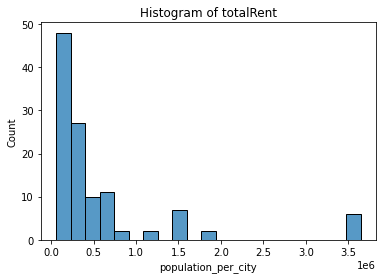

In [29]:
sns.histplot(Uni4U_Data["population_per_city"], kde = False).set_title("Histogram of totalRent")
plt.show()

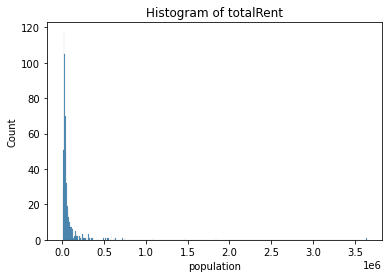

In [101]:
sns.histplot(population_only_adjusteddata["population"], kde = False).set_title("Histogram of totalRent")
plt.show()

C:\Users\Marek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


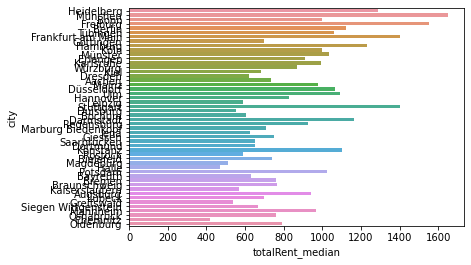

In [102]:
x="totalRent_median"
y="city"

sns.barplot(x,y, data=Uni4U_Data)

plt.show()

##### 2.x. Boxplots

In [99]:
appartments_only_adjusteddata.columns

Index(['Unnamed: 0', 'regio1', 'serviceCharge', 'balcony',
       'telekomUploadSpeed', 'totalRent', 'yearConstructed', 'hasKitchen',
       'cellar', 'baseRent', 'livingSpace', 'petsAllowed', 'lift', 'noRooms',
       'garden', 'regio2', 'regio3'],
      dtype='object')

count     4515.000000
mean      1904.166454
std       1087.675013
min          1.000000
25%       1250.000000
50%       1650.000000
75%       2220.000000
max      20466.120000
Name: totalRent, dtype: float64

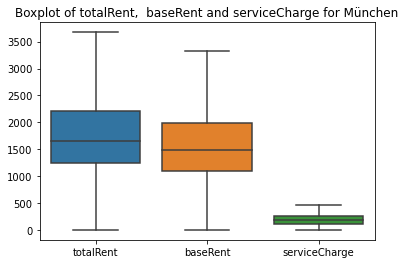

In [86]:
#Shows the boxplots of the chosen columns to compare them.
input_city= input_city_adjusted()
searched_city=appartments_only_adjusteddata[appartments_only_adjusteddata["regio2"]== input_city]
sns.boxplot(data=searched_city.loc[:, ["totalRent",  "baseRent", "serviceCharge"]], showfliers = False) #"showfliers = False" removes all outliners (Easier to see the main Data)
plt.title("Boxplot of totalRent,  baseRent and serviceCharge for "+input_city)
plt.savefig("Pictures/boxplot_"+input_city+".jpg")
print(input_city)
searched_city["totalRent"].describe()

Aachen


count    2591.000000
mean      808.837117
std       359.365629
min       200.000000
25%       562.000000
50%       735.000000
75%       955.000000
max      3655.000000
Name: totalRent, dtype: float64

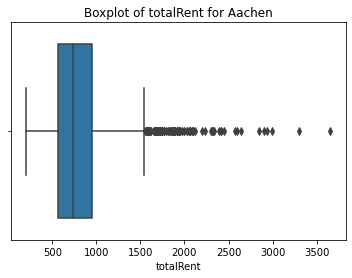

In [98]:
#Here you can get a Boxplot for the wanted city and the wanted column:
input_city=input_city_adjusted()
input_column=input_appartment_column_adjusted()

searched_city=appartments_only_adjusteddata[appartments_only_adjusteddata["regio2"]== input_city]
sns.boxplot(x=searched_city[input_column])
plt.title("Boxplot of " +input_column+" for "+input_city)
plt.savefig("Pictures/boxplot_"+input_city+"_"+input_column+ ".jpg")
print(input_city)
searched_city[input_column].describe()


##### 2.x. Correlation

C:\Users\Marek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


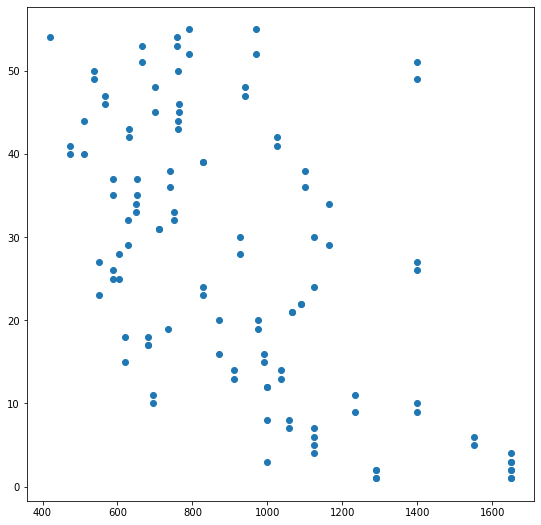

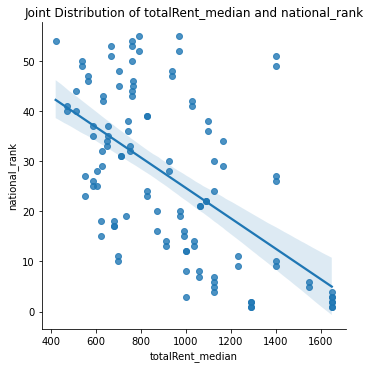

                  totalRent_median  national_rank
totalRent_median          1.000000      -0.585647
national_rank            -0.585647       1.000000


In [59]:
#Getting a visual correlation and the correlation coefficent for two wished columns:

#First type in the wished columns:
x="totalRent_median"
y="national_rank"

#Second the needed code is executed:
plt.figure(figsize=(20,20))
plt.subplot(2,2,2)

    #The needed Variables are set as dependent and independent:
plt.scatter(x = Uni4U_Data[x], y = Uni4U_Data[y])
sns.lmplot(x, y, data=Uni4U_Data)

    #The Titel of the visual
plt.title("Joint Distribution of "+x+  " and "+y )
plt.show()
print(Uni4U_Data[[x,y]].dropna().corr())